<a href="https://colab.research.google.com/github/nivethanancroos/SmartWasteClassifier/blob/main/Smart_Waste_Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import os


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80/20 split
    rotation_range=25,
    zoom_range=0.25,
    shear_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset-resized/dataset-resized',
    target_size=(150, 150),  # increased resolution
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset-resized/dataset-resized',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2025 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)


In [13]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop, lr_reduce]
)


Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 597s 9s/step - accuracy: 0.3705 - loss: 6.6987 - val_accuracy: 0.1928 - val_loss: 7.9689 - learning_rate: 5.0000e-04
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.4991 - loss: 1.6365 - val_accuracy: 0.2028 - val_loss: 9.9216 - learning_rate: 5.0000e-04
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.5252 - loss: 1.3947 - val_accuracy: 0.2425 - val_loss: 4.9807 - learning_rate: 5.0000e-04
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.5514 - loss: 1.3008 - val_accuracy: 0.2545 - val_loss: 3.0475 - learning_rate: 5.0000e-04
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.5306 - loss: 1.3155 - val_accuracy: 0.2227 - val_loss: 3.9368 - learning_rate: 5.0000e-04
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5500 - loss: 1.2639 - val_accuracy: 0.3260 - val_loss: 1.6890 - learning_rate: 5.0000e-04
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - accuracy: 0.5272 

In [14]:
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 731ms/step - accuracy: 0.4827 - loss: 1.3299
Validation Accuracy: 48.91%


Saving download (2).png to download (2) (2).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


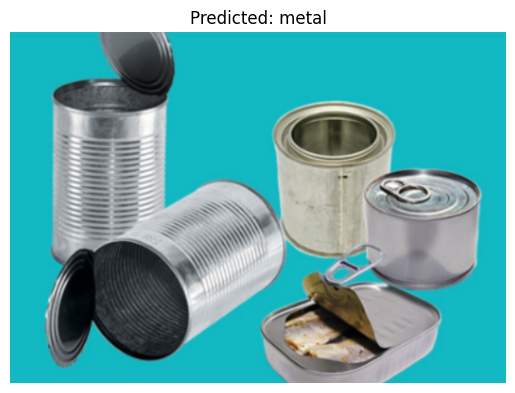

Predicted Category: metal
metal detected → Sorting to Bin 3


In [22]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload an image from your PC
uploaded = files.upload()

for filename in uploaded.keys():
    # Read and preprocess
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Corrected: Resize to (150, 150) to match model input size
    img_resized = cv2.resize(img, (150,150)) / 255.0
    img_input = np.expand_dims(img_resized, axis=0)

    # Prediction
    pred = model.predict(img_input)
    class_idx = np.argmax(pred)
    class_labels = list(train_generator.class_indices.keys())

    # Show result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_labels[class_idx]}")
    plt.show()

    print(f"Predicted Category: {class_labels[class_idx]}")
    print(f"{class_labels[class_idx]} detected → Sorting to Bin {class_idx+1}")

Saving download (1).png to download (1) (3).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


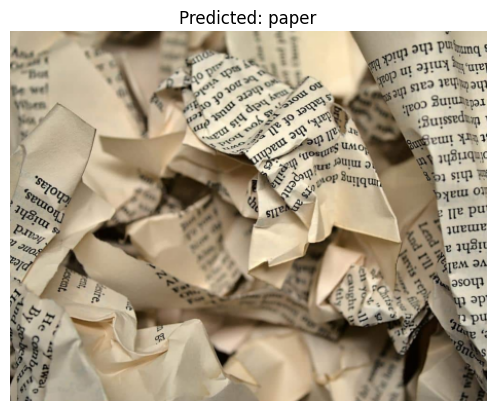

Predicted Category: paper
paper detected → Sorting to Bin 4


In [24]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload an image from your PC
uploaded = files.upload()

for filename in uploaded.keys():
    # Read and preprocess
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Corrected: Resize to (150, 150) to match model input size
    img_resized = cv2.resize(img, (150,150)) / 255.0
    img_input = np.expand_dims(img_resized, axis=0)

    # Prediction
    pred = model.predict(img_input)
    class_idx = np.argmax(pred)
    class_labels = list(train_generator.class_indices.keys())

    # Show result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_labels[class_idx]}")
    plt.show()

    print(f"Predicted Category: {class_labels[class_idx]}")
    print(f"{class_labels[class_idx]} detected → Sorting to Bin {class_idx+1}")

Saving WM-IM-2024-03-22T102852.568.jpg to WM-IM-2024-03-22T102852.568 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


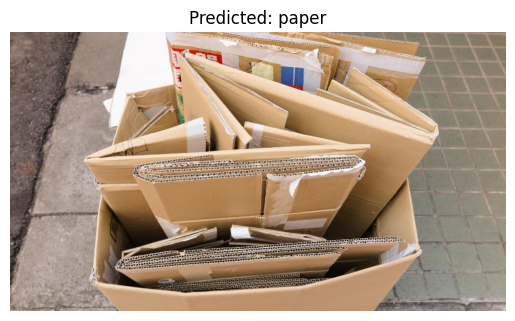

Predicted Category: paper
paper detected → Sorting to Bin 4


In [30]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload an image from your PC
uploaded = files.upload()

for filename in uploaded.keys():
    # Read and preprocess
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Corrected: Resize to (150, 150) to match model input size
    img_resized = cv2.resize(img, (150,150)) / 255.0
    img_input = np.expand_dims(img_resized, axis=0)

    # Prediction
    pred = model.predict(img_input)
    class_idx = np.argmax(pred)
    class_labels = list(train_generator.class_indices.keys())

    # Show result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_labels[class_idx]}")
    plt.show()

    print(f"Predicted Category: {class_labels[class_idx]}")
    print(f"{class_labels[class_idx]} detected → Sorting to Bin {class_idx+1}")